To the README: [README](./README.md)<br/>

--------------------------------------------------------------------------------

# Credit Card: EDA

## Reading and Understanding

In [1]:
# Import base packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.style import Colors
import utils.credit_card as util
from utils.credit_card import Col

In [2]:
# Load data
data = pd.read_csv(util.File.original)

In [3]:
# First five rows
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Descriptive statistics
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Findings

The (original) data frame consists of $284,807$ records and $31$ features.

28 of those features appear to be an encoded/ encrypted representation of information related to the credit card or the transaction.
Those features with column names `V1` to `V28` appear to be centred around $0$, but with individual standard deviations as well as individual limits.

There is a `Time` column in the dataset with `float` values, ranging from $0.0$ to $172,792.0$.
Those numbers suggest that we are actually looking at a time distance with respect to an arbitrary reference point in time.
The maximum, $172,792.0 \approx 47.998 \cdot 60^2$, suggests that we are looking at a range of $48\ h$.

The `Amount` column, consisting of `float`ing point numbers again, represents the transaction amount.
Having no further information on that, we may assume it's the amount in USD.
The fact that the minimum amount present is $0.0$ could be either an error or it could represent a test transaction to see if an account exists.

Finally, the `Class` column consists of `int`egers exclusively.
We may assume that, upon closer inspection, we will find only two distinct values - $0$ and $1$ - indicating whether or not the record belongs to a regular or a fradulent transaction.  This will be our prediction target for the later machine learning part.

Before we jump to conclusions, however, let us check our assumption:

In [6]:
print(f'The column "Class" contains {data.Class.nunique()} unique values:\n{data.Class.unique()}')

The column "Class" contains 2 unique values:
[0 1]


Which one is the fraud, which one represents the genuine transactions?

In [7]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

It is likely that the $284,315$ records with class $0$ are to be considered the genuine transactions, and the remaining $492$ records with class $1$ are the frauds.

## Missing Values

Although it is clear from carefully looking at the output from cell 4 (`data.info()`) that there are no missing values, let's be sure:

In [10]:
null_counts = data.isnull().sum()
null_counts[null_counts>0]

Series([], dtype: int64)

Getting an empty series means that there are no missing entries in the data frame.

## Duplicates

In [9]:
data.duplicated().sum()

1081

The dataset consists of $1081$ duplicate records.

In [10]:
# Check some of the duplicates
data[data.duplicated()][['Time', 'Amount', 'Class']].head(10)

,Time,Amount,Class
33,26.0,6.14,0
35,26.0,1.77,0
113,74.0,1.18,0
114,74.0,1.18,0
115,74.0,1.18,0
221,145.0,6.00,0
223,145.0,6.74,0
1178,919.0,158.00,0
1180,919.0,1.00,0
1382,1074.0,158.00,0


In [11]:
# Are they all genuine?
data[data.duplicated()].Class.value_counts()

Class
0    1062
1      19
Name: count, dtype: int64

It appears that both genuine transactions as well as frauds have been recorded more than once in this dataset across various points in time and over a range of transaction amounts.  We are going to remove them moving forward with our inspection.

## Preparing the Data Frame for Further Inspection and Visualization

Renaming the columns has no effect other than making them appear differently in the plots.
We will use the `Col._all_pretty` field from the `utils` module for that.
On top of that, we will add a converted version of the `Time` column to express the distance from the datasets's reference point in time in hours, not in seconds.
Other than that, we will only remove the duplicated records and store the preprocessed data frame in its own `.csv` file for importing it later into the ML notebooks.

In [12]:
# Make a copy of the original dataframe and remove the duplicates
data_ = data.drop_duplicates().copy()

# Convert the time column
data_.Time = data_.Time / 3600.

# Rename the columns
data_.columns = Col._all_pretty

# Save the new data frame in a `.csv` file
import os
if not os.path.exists(util.File.preprocessed):
    data_.to_csv(util.File.preprocessed, index=False)

--------------------------------------------------------------------------------

## Distribution of the Target Column

A graphical representation of the distribution between fradulent and records in the dataset itself yields no deeper insight.
Thus, we will just compute the percentage of genuine and fradulent transactions:

In [13]:
pd.DataFrame({
    'Activity': ['Genuine', 'Fraud'],
    'Percent': (data_[Col.target].value_counts() / len(data_) * 100.).tolist()
})

,Activity,Percent
0,Genuine,99.83329
1,Fraud,0.16671


However, for further comparison, it is going to be useful to have separate data frames to compare the distributions of other features with respect to the target column.

In [14]:
data_genuine = data_[data_[Col.target]==0].copy()
data_fraud   = data_[data_[Col.target]==1].copy()

## Distribution of Amount

First, let's look at the distribution of the `Amount` column over the entire dataset.

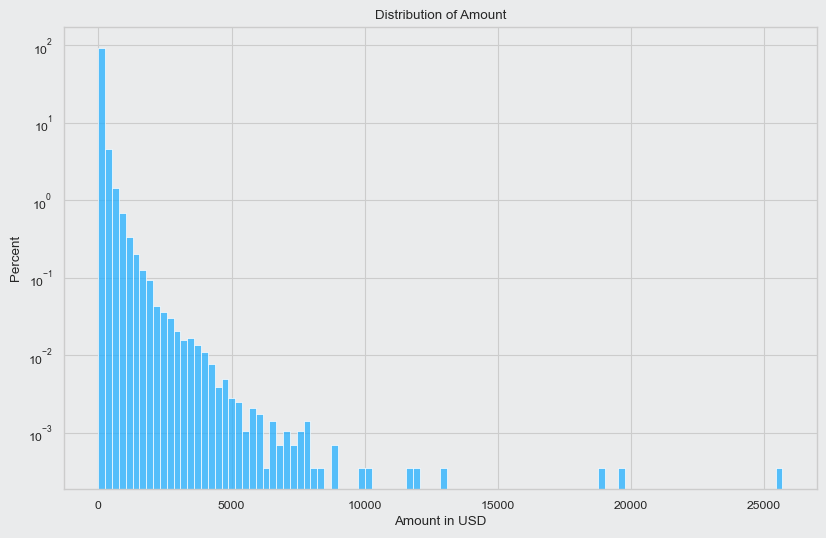

In [15]:
sns.histplot(data=data_, x=Col.amount, bins=100, stat='percent')
plt.yscale('log')
plt.title('Distribution of Amount')
plt.show()

Note that the `Percent` axis is scaled logarithmically.
Otherwise, one might accidentally assume the `Amount` to follow an exponential distribution, which is not the case.
Now, let's take a deeper look into the fradulent records to see if they behave similarly.

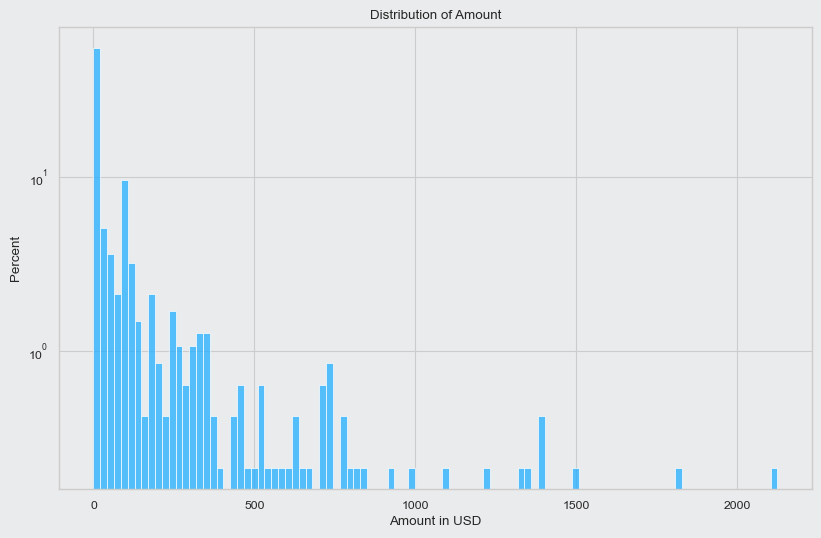

In [16]:
sns.histplot(data=data_fraud, x=Col.amount, bins=100, stat='percent')
plt.yscale('log')
plt.title('Distribution of Amount')
plt.show()

While spread over a narrower range of amounts and also sparse, this subset shows similar behaviour.
It is not possible to definitively associate frauds with particularly high or low transaction amounts, nor do they show particularly telling discrepancies compared to the overall dataset.

The difference in their amount range becomes more obvious when comparing the datasets using a box plot:

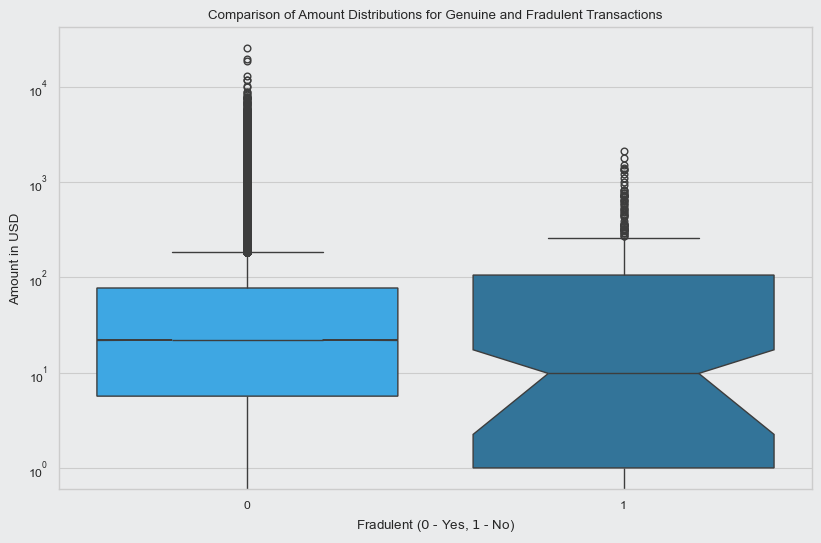

In [17]:
sns.boxplot(data=data_, x=Col.target, hue=Col.target, y=Col.amount, palette=Colors.blues2, notch=True, legend=False)
plt.yscale('log')
plt.title('Comparison of Amount Distributions for Genuine and Fradulent Transactions')
plt.show()

Now it becomes obvious that it's more likely for transactions with higher amounts to be more likely to be genuine.
An explanation could be that those transactions are more likely to be closely observed or rather easier to notice should something be amiss.
That is to say that it might be easier to hide or disguise frauds behind smaller transaction amounts.

Next, let's have a look at the distribution of the amount over the time.

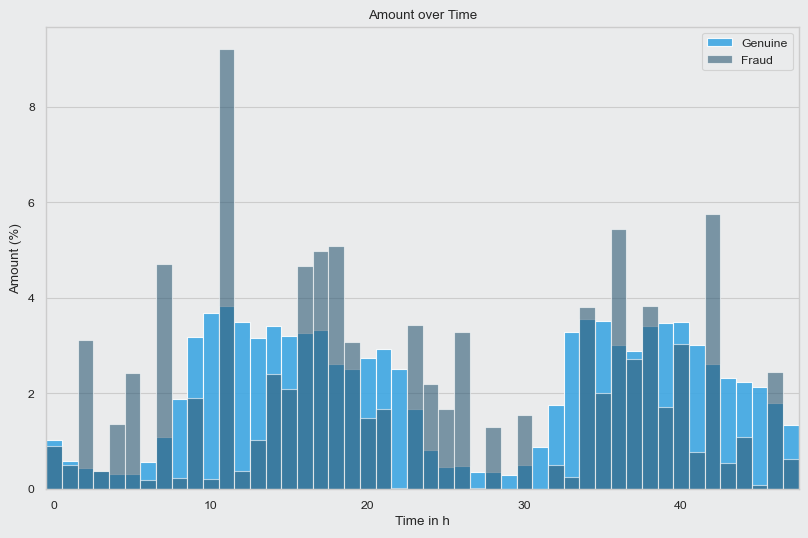

In [18]:
time_data_genuine = data_genuine.copy()
time_data_fraud = data_fraud.copy()
time_data_genuine[Col.time] = time_data_genuine[Col.time].map(int)
time_data_fraud[Col.time] = time_data_fraud[Col.time].map(int)
total_genuine = time_data_genuine[Col.amount].sum() / 100.
total_fraud = time_data_fraud[Col.amount].sum() / 100.
sns.barplot(data=time_data_genuine[[Col.time, Col.amount]].groupby(Col.time).sum()/total_genuine, x=Col.time, y=Col.amount, color=Colors.blue, alpha=.9, width=1., label='Genuine')
sns.barplot(data=time_data_fraud[[Col.time, Col.amount]].groupby(Col.time).sum()/total_fraud, x=Col.time, y=Col.amount, color=Colors.blues[3], alpha=.6, width=1., label='Fraud')
plt.title('Amount over Time')
plt.xlabel(Col.time)
plt.xticks([10*n for n in range(5)])
plt.ylabel('Amount (%)')
plt.legend()
plt.show()

There, a discrepance is visible.
However, lacking a notable pattern overall, the fradulent image doesn't show any indicator for a preferred time of day or a uniquely distinguishable frequency if one considers the transaction amount.

Now if the amount itself doesn't give any deeper insight, then let's have a look at the number of transactions instead.

## Distribution of Transactions

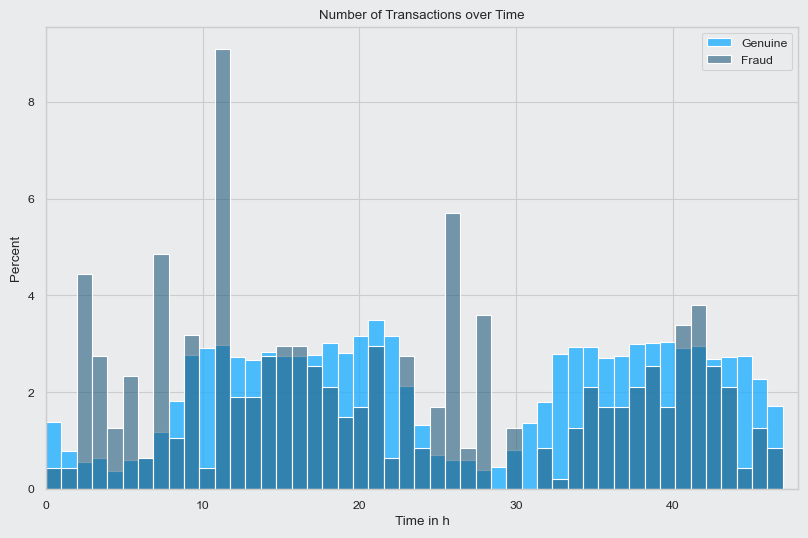

In [19]:
sns.histplot(data=time_data_genuine, x=Col.time, color=Colors.blue, alpha=.8, label='Genuine', stat='percent', bins=48)
sns.histplot(data=time_data_fraud, x=Col.time, color=Colors.blues[3], alpha=.6, label='Fraud', stat='percent', bins=48)
plt.xlim(0, 48)
plt.title('Number of Transactions over Time')
plt.legend()
plt.show()

Again, it is difficult to spot a particular pattern for the fradulent data, whereas the genuine transactions seem to follow an activity or day-and-night cycle.
However, it appears that the highes percentages of frauds tend to appear during the usually calm periods for genuine transactions.
Although one should keep in mind that those two datasets consist of vastly different amounts of supporting records, so this could also be just an artifact of lacking more data.

Next, slowly focusing our eye on the upcoming machine learning part, let's look at the kind of distributions for the remaining columns as well as their correlation with the target column.

## Distributions of the Encoded Columns

There are several tests available for testing a population for a specific kind of distribution.
[Q-Q plots](https://en.wikipedia.org/wiki/Q–Q_plot) and the [Shapiro-Wilk Test](https://en.wikipedia.org/wiki/Shapiro–Wilk_test) are a few examples.
[Lilliefor's Test](https://en.wikipedia.org/wiki/Lilliefors_test) is a variant that can test both normal and exponential distributions.
Thus, considering we might find either in our dataset, we will use this one in this part of our exploration.

As a remark, however, let it be noted that Lilliefor's is considered less reliable/ robust than Shapiro-Wilk.  The only reaso why we apply it here is for testing two cases with one tool, and it's perfectly sufficient for our purposes.

The `statsmodels` package contains the functions `lilliefor`, `kstest_normal` and `kstest_exponential`, that will help us here.
However, they are functionally the same, so we will use the basic version:

In [20]:
from statsmodels.stats.api import lilliefors

First, let's convince ourselves that the `Amount` is neither normally nor exponentially distributed.

In [21]:
threshold = 0.05

# Test for normal distribution
_, p_normal = lilliefors(data_[Col.amount], dist='norm')
print(f'{p_normal = :.6f}, thus the amount {"is" if p_normal > threshold else "is not"} normally distributed.')

# Test for exponential distribution
_, p_exponential = lilliefors(data_[Col.amount], dist='exp')
print(f'{p_exponential = :.6f}, thus the amount {"is" if p_exponential > threshold else "is not"} exponentially distributed.')

p_normal = 0.001000, thus the amount is not normally distributed.
p_exponential = 0.001000, thus the amount is not exponentially distributed.


Now, with that being confirmed, let's check all the encrypted/ encoded columns:

In [22]:
from functools import partial

def test_column(column, data, test): return lilliefors(data[column], dist=test)[1]
test_column_normal = partial(test_column, test='norm')
test_column_exponential = partial(test_column, test='exp')
def interpret(p): return 'Yes' if p > threshold else 'No'

columns = data_.columns[1:-2]

print('Column\t\tNormal\t\t\tExponential')
for column in columns:
    print(f'{column}\t-\t{(p := test_column_normal(column, data_)):.6f}\t{interpret(p)}\t{(p := test_column_exponential(column, data_)):.6f}\t{interpret(p)}')

Column		Normal			Exponential
V $1$	-	0.001000	No	0.001000	No
V $2$	-	0.001000	No	0.001000	No
V $3$	-	0.001000	No	0.001000	No
V $4$	-	0.001000	No	0.001000	No
V $5$	-	0.001000	No	0.001000	No
V $6$	-	0.001000	No	0.001000	No
V $7$	-	0.001000	No	0.001000	No
V $8$	-	0.001000	No	0.001000	No
V $9$	-	0.001000	No	0.001000	No
V $10$	-	0.001000	No	0.001000	No
V $11$	-	0.001000	No	0.001000	No
V $12$	-	0.001000	No	0.001000	No
V $13$	-	0.001000	No	0.001000	No
V $14$	-	0.001000	No	0.001000	No
V $15$	-	0.001000	No	0.001000	No
V $16$	-	0.001000	No	0.001000	No
V $17$	-	0.001000	No	0.001000	No
V $18$	-	0.001000	No	0.001000	No
V $19$	-	0.001000	No	0.001000	No
V $20$	-	0.001000	No	0.001000	No
V $21$	-	0.001000	No	0.001000	No
V $22$	-	0.001000	No	0.001000	No
V $23$	-	0.001000	No	0.001000	No
V $24$	-	0.001000	No	0.001000	No
V $25$	-	0.001000	No	0.001000	No
V $26$	-	0.001000	No	0.001000	No
V $27$	-	0.001000	No	0.001000	No
V $28$	-	0.001000	No	0.001000	No


Insights like this need to be considered when considering machine learning models and scaling using, say, `sklearn.preprocessing.StandardScaler`.

## Preparing the Training and Testing Datasets

Considering that we want to train a selection of different models in a reasonable amount of time we want to reduce the amount of data our prototypes are to be trained on.

For this purpose, we will hand-pick the columns with the highest correlation factors with the target column for these before giving the best ones the full featureset to train on.

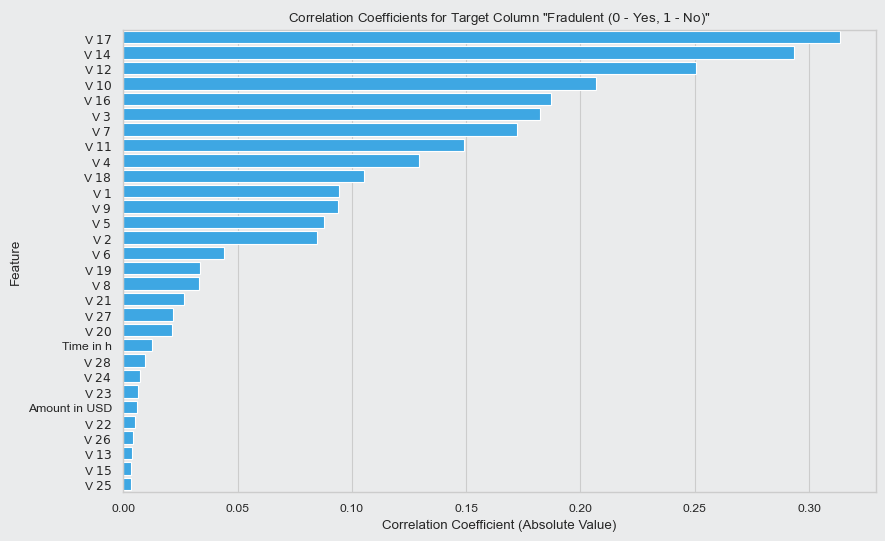

In [23]:
correlations = np.abs(data_.corrwith(data_[Col.target])).sort_values(ascending=False)[1:]

# Save values for later
if not os.path.exists(util.File.correlations):
    _correlations = correlations.reset_index()
    _correlations.columns = ['Feature', 'Coefficient']
    _correlations.to_csv(util.File.correlations, index=False)

# Visualize
sns.barplot(data=correlations, orient='h')
plt.xlabel('Correlation Coefficient (Absolute Value)')
plt.ylabel('Feature')
plt.title(f'Correlation Coefficients for Target Column "{Col.target}"')
plt.show()

And just out of curiosity we will generate a heatmap of all features and their correlation coefficients, although we won't get any deeper insight from that.
In other instances, such a graphich could hint towards columns that are so strongly correlated that learning machines would only need one of them to produce reliable results, thus potentially helping reducing the amount of data to be processed.

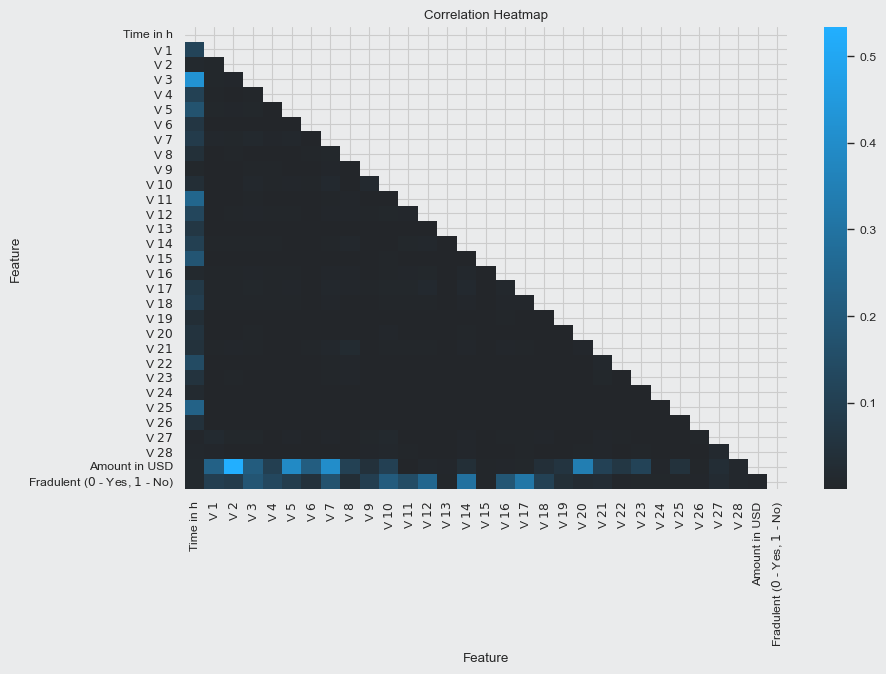

In [24]:
full_correlations = np.abs(data_.corr())
mask = np.zeros_like(full_correlations)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=full_correlations, mask=mask, cmap=Colors.blues_c)
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation Heatmap')
plt.show()

Next, we need to separate our training and verification data.
We do that at this stage to have a fix, unique verification dataset for all of our models, no matter what we are going to do further down the road with the training data.
This will allow us to compare all models objectively.

We choose to split our data into training and verification subsets with a 4:1 ratio.

In [25]:
from sklearn.model_selection import train_test_split

training_df, verification_df = train_test_split(data_, test_size=.2, stratify=data_[Col.target], random_state=404)

# Store both subsets into .csv files for later
if not os.path.exists(util.File.training):
    training_df.to_csv(util.File.training, index=False)

if not os.path.exists(util.File.verification):
    verification_df.to_csv(util.File.verification, index=False)

Furthermore, we need to take the dataset's imbalance into account.

If we let our models train on full dataset they would barely learn from the actual frauds.
Thus, we need to create a balance between the two target values.
Basically we could either use an oversampling approach to inflate the minority class or we could resample the majority class.
Both approaches have their advantages and disadvantages.
However, considering that oversampling algorithms (such as [SMOTE](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html)) may create noise and patterns that don't represent the real behaviour of the cases we want to classify, we use a simple undersampling algorithm instead.
Note that more sophisticated algorithms exist as well.

In [26]:
from sklearn.utils import resample

training_frauds = training_df[training_df[Col.target]==1]
training_genuine = training_df[training_df[Col.target]==0]
n = 4 * len(training_frauds)
undersampled = resample(training_genuine, n_samples=n, random_state=404)
training_undersampled = pd.concat([training_frauds, undersampled], axis=0)

# Store dataframe for later
if not os.path.exists(util.File.training_undersampled):
    training_undersampled.to_csv(util.File.training_undersampled, index=False)

In [27]:
print(f'Shape of the original training dataset: {training_df.shape}')
print(f'Shape of the new training dataset:      {training_undersampled.shape}')
print(f'Shape of the verification dataset:      {verification_df.shape}')

Shape of the original training dataset: (226980, 31)
Shape of the new training dataset:      (1890, 31)
Shape of the verification dataset:      (56746, 31)


One final step; this is more an experiment rather than a promised success.
Earlier, we discussed that neither of the features is normally distributed.
However, many machine learning models perform better on normally distributed or rather scaled data.

So we will prepare a scaled version of the previous subsets and see if the models acutally benefit from this step despite applying it to a dataset which we don't know the actual distribution of.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
training_scaled = pd.concat([
    pd.DataFrame(scaler.fit_transform(training_df.drop(Col.target, axis=1)), columns=training_df.columns[:-1]),
    training_df[Col.target].reset_index().drop('index', axis=1)
], axis=1)
training_undersampled_scaled = pd.concat([
    pd.DataFrame(scaler.transform(training_undersampled.drop(Col.target, axis=1)), columns=training_undersampled.columns[:-1]),
    training_undersampled[Col.target].reset_index().drop('index', axis=1)
], axis=1)
verification_scaled = pd.concat([
    pd.DataFrame(scaler.transform(verification_df.drop(Col.target, axis=1)), columns=verification_df.columns[:-1]),
    verification_df[Col.target].reset_index().drop('index', axis=1)
], axis=1)

# Store the scaled sets for later
if not os.path.exists(util.File.training_scaled):
    training_scaled.to_csv(util.File.training_scaled, index=False)
if not os.path.exists(util.File.training_undersampled_scaled):
    training_undersampled_scaled.to_csv(util.File.training_undersampled_scaled, index=False)
if not os.path.exists(util.File.verification_scaled):
    verification_scaled.to_csv(util.File.verification_scaled, index=False)

In [29]:
# Check the shapes again to see that nothing is broken:
print(f'Shape of the (scaled) original training dataset: {training_scaled.shape}')
print(f'Shape of the (scaled) new training dataset:      {training_undersampled_scaled.shape}')
print(f'Shape of the (scaled) verification dataset:      {verification_scaled.shape}')

Shape of the (scaled) original training dataset: (226980, 31)
Shape of the (scaled) new training dataset:      (1890, 31)
Shape of the (scaled) verification dataset:      (56746, 31)


This is all that we need from the EDA to get started with the machine learning part.

--------------------------------------------------------------------------------

To next notebook: [Credit Card ML](./credit-card-ml.ipynb)